In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../data/2016-08-08-last-year.xz',
                   parse_dates=[16],
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str})

There are 374,484 expenses reimbursed in the past year.

In [3]:
print(data.shape)

(374484, 29)


In [4]:
data.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
0,5886345,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,165.65,11,2015,0,NaN,NaN,1255355,5294,NaN,3074
1,5886361,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,59.48,12,2015,0,NaN,NaN,1255361,5294,NaN,3074
2,5886341,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,130.95,11,2015,0,NaN,NaN,1255355,5294,NaN,3074
3,5928783,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,193.06,12,2015,0,NaN,NaN,1268867,5370,NaN,3074
4,5608486,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary...,...,310.25,2,2015,0,NaN,NaN,1168538,4966,NaN,3074


In [5]:
data.iloc[0]

document_id                                                             5886345
congressperson_name                                           ABEL MESQUITA JR.
congressperson_id                                                        178957
congressperson_document                                                       1
term                                                                       2015
state                                                                        RR
party                                                                       DEM
term_id                                                                      55
subquota_number                                                               1
subquota_description          Maintenance of office supporting parliamentary...
subquota_group_id                                                             0
subquota_group_description                                                  NaN
supplier                                

In [6]:
def change_type_to_category(column):
    data[column] = data[column].astype('category')

category_columns = ['congressperson_id',
       'state', 'party', 'term_id',
       'subquota_number', 'subquota_group_id',
       'document_type', 'applicant_id', 'congressperson_name']

[change_type_to_category(column) for column in category_columns]; None

Last year, R$213,668,049.56 were spent without public bidding. On average, each of the 374,484 expenses had a value of 570 Reais.

In [7]:
data['net_value'].describe()

count    374484.000000
mean        570.566565
std        1993.167639
min       -9240.770000
25%          45.000000
50%         134.310000
75%         481.000000
max      189600.000000
Name: net_value, dtype: float64

In [8]:
data['net_value'].sum()

213668049.56999993

Data seems to contain outliers. Negative net values and other records in the range of hundreds of thousands of Reais.

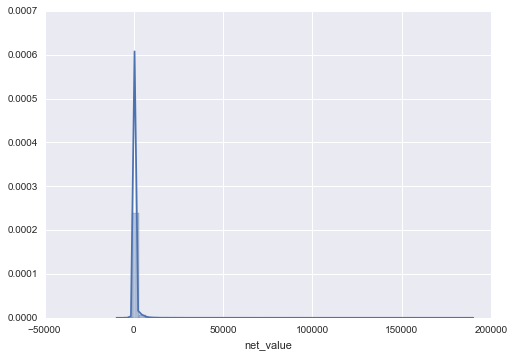

In [9]:
sns.distplot(data['net_value'])

Most expensive document reimbursed by the government: R$189,600.00

In [10]:
most_expensive_reimbursement = \
    data[data['net_value'] == data['net_value'].max()].iloc[0]
most_expensive_reimbursement

document_id                                               5884288
congressperson_name                           ARNALDO FARIA DE SÁ
congressperson_id                                           73434
congressperson_document                                       337
term                                                         2015
state                                                          SP
party                                                         PTB
term_id                                                        55
subquota_number                                                 5
subquota_description          Publicity of parliamentary activity
subquota_group_id                                               0
subquota_group_description                                    NaN
supplier                                      GRÁFICA TRÊS PONTAS
cnpj_cpf                                           54450705000130
document_number                                          00012480
document_t

## Negative net values

Talking about negative values...

In [11]:
negative_net_values = data[data['net_value'] < 0]
print(len(negative_net_values), len(negative_net_values) / len(data))

17646 0.047120838273464284


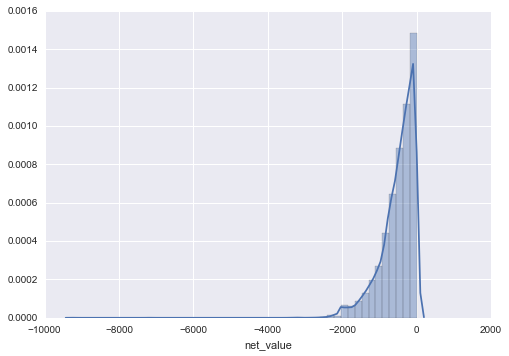

In [12]:
sns.distplot(negative_net_values['net_value'])

Not really sure what they mean.

In [13]:
negative_net_values.sample(random_state=0).iloc[0]

document_id                                   NaN
congressperson_name               AFONSO FLORENCE
congressperson_id                          160508
congressperson_document                       182
term                                         2015
state                                          BA
party                                          PT
term_id                                        55
subquota_number                               999
subquota_description          Flight ticket issue
subquota_group_id                               0
subquota_group_description                    NaN
supplier                          Cia Aérea - GOL
cnpj_cpf                           07575651000159
document_number                   Bilhete: MYJH2Y
document_type                                   0
issue_date                    2015-09-18 00:00:00
document_value                            -356.73
remark_value                                    0
net_value                                 -356.73


[According to Eduardo Cuducos](https://github.com/datasciencebr/serenata-de-amor/pull/24#issuecomment-242992477) on a pull request and the official documentation, negative values comprehend flight tickets issued but not used.

In [14]:
negative_net_values['subquota_description'].unique()

array(['Flight ticket issue'], dtype=object)

In this specific case, it seems that Afonso Florence purchased a flight ticket of R\$ 556,73. When canceled it, the returned amount was just R\$ 356.73, generating a cancellation cost of R\$200 (or 64%).

In [15]:
flight_tickets = data[data['document_number'] == 'Bilhete: MYJH2Y']
flight_tickets.iloc[0]

document_id                                   NaN
congressperson_name               AFONSO FLORENCE
congressperson_id                          160508
congressperson_document                       182
term                                         2015
state                                          BA
party                                          PT
term_id                                        55
subquota_number                               999
subquota_description          Flight ticket issue
subquota_group_id                               0
subquota_group_description                    NaN
supplier                          Cia Aérea - GOL
cnpj_cpf                           07575651000159
document_number                   Bilhete: MYJH2Y
document_type                                   0
issue_date                    2015-09-10 00:00:00
document_value                             556.73
remark_value                                    0
net_value                                  556.73


In [16]:
flight_tickets.iloc[1]

document_id                                   NaN
congressperson_name               AFONSO FLORENCE
congressperson_id                          160508
congressperson_document                       182
term                                         2015
state                                          BA
party                                          PT
term_id                                        55
subquota_number                               999
subquota_description          Flight ticket issue
subquota_group_id                               0
subquota_group_description                    NaN
supplier                          Cia Aérea - GOL
cnpj_cpf                           07575651000159
document_number                   Bilhete: MYJH2Y
document_type                                   0
issue_date                    2015-09-18 00:00:00
document_value                            -356.73
remark_value                                    0
net_value                                 -356.73


## Long (right) tail

Let's try to remove outliers.

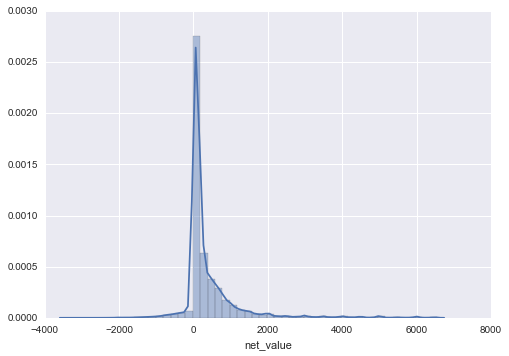

In [17]:
dist_range = data['net_value'].mean() + data['net_value'].std() * 3 * np.r_[-1, 1]
wo_outliers = \
    (data['net_value'] >= dist_range[0]) & (data['net_value'] <= dist_range[1])
data_wo_outliers = data[wo_outliers]
sns.distplot(data_wo_outliers['net_value'])

### Top 45%

45% of the dataset have net values larger than 3 standard deviations from the mean. Meaning: tail does not contain just a few outliers, but a good portion of the dataset. Let's study what is contained in this long tail (greater than 3 stds).

In [18]:
outliers = data[~data.isin(data_wo_outliers)['document_id']]
print(len(outliers), len(outliers) / len(data))

170204 0.4545027290885592


In [19]:
outliers.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
76,5851959,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,18000.0,11,2015,0,NaN,NaN,1244585,5242,NaN,3074
77,5887522,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,18000.0,12,2015,0,NaN,NaN,1255689,5298,NaN,3074
78,5920934,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,18000.0,12,2015,0,NaN,NaN,1266231,5422,NaN,3074
79,5761747,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,20000.0,7,2015,0,NaN,NaN,1217319,5124,NaN,3074
80,5793677,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,4,"Consultancy, research and technical work",...,20000.0,8,2015,0,NaN,NaN,1226779,5170,NaN,3074


In [20]:
outliers['subquota_description'].describe()

count                  170204
unique                     14
top       Flight ticket issue
freq                   116993
Name: subquota_description, dtype: object

Let's build a ranking of expenses with higher values.

In [21]:
from functools import partial

subquota_number_ranking = outliers. \
    groupby('subquota_number', as_index=False). \
    agg({'net_value': np.nansum})
subquotas = data[['subquota_number', 'subquota_description']]. \
    drop_duplicates('subquota_number', keep='first')
subquota_number_ranking = \
    pd.merge(subquota_number_ranking,
             subquotas,
             how='left',
             on='subquota_number'). \
    sort_values('net_value', ascending=False)

In [22]:
subquota_number_ranking.head()

,subquota_number,net_value,subquota_description
17,999,48229356.25,Flight ticket issue
3,5,34730760.81,Publicity of parliamentary activity
2,4,16952282.42,"Consultancy, research and technical work"
12,120,8362929.39,Automotive vehicle renting or charter
6,10,5103956.53,Telecommunication


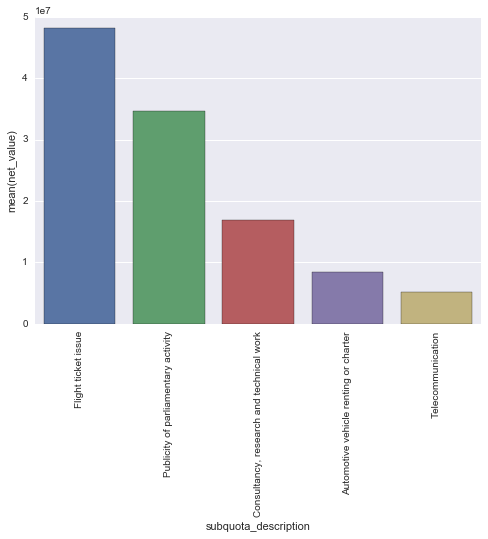

In [23]:
sns.barplot(x='subquota_description',
            y='net_value',
            data=subquota_number_ranking.head())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90); None

### Top 1%

How the top 1% look like?

In [24]:
top_1_percent_num = int(.01 * len(data))
top_1_percent = data. \
    sort_values('net_value', ascending=False). \
    iloc[0:top_1_percent_num + 1]

top_1_percent_subquota_ranking = top_1_percent. \
    groupby('subquota_number', as_index=False). \
    agg({'net_value': np.nansum})
top_1_percent_subquota_ranking = \
    pd.merge(top_1_percent_subquota_ranking,
             subquotas,
             how='left',
             on='subquota_number'). \
    sort_values('net_value', ascending=False)

In [25]:
top_1_percent_subquota_ranking.head()

,subquota_number,net_value,subquota_description
3,5,31241274.99,Publicity of parliamentary activity
2,4,14737527.82,"Consultancy, research and technical work"
12,120,5121283.86,Automotive vehicle renting or charter
11,119,1754436.23,Aircraft renting or charter of aircraft
0,1,1728364.32,Maintenance of office supporting parliamentary...


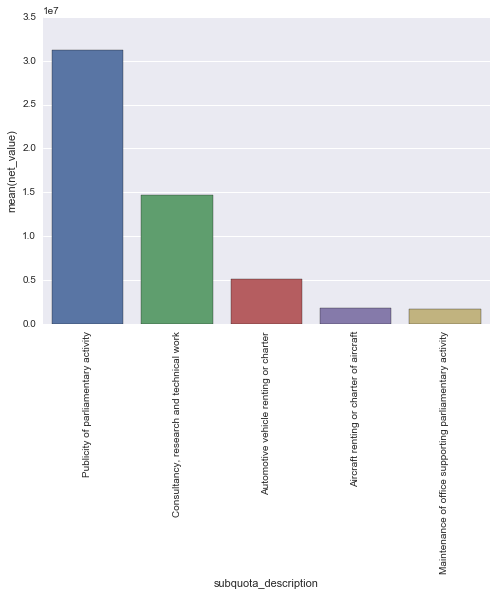

In [26]:
sns.barplot(x='subquota_description',
            y='net_value',
            data=top_1_percent_subquota_ranking.head())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90); None

This is the most expensive reimbursement from last year: R$189,600 for printing 120,000 units of something about the Elderly Statute.

In [27]:
most_expensive_reimbursement

document_id                                               5884288
congressperson_name                           ARNALDO FARIA DE SÁ
congressperson_id                                           73434
congressperson_document                                       337
term                                                         2015
state                                                          SP
party                                                         PTB
term_id                                                        55
subquota_number                                                 5
subquota_description          Publicity of parliamentary activity
subquota_group_id                                               0
subquota_group_description                                    NaN
supplier                                      GRÁFICA TRÊS PONTAS
cnpj_cpf                                           54450705000130
document_number                                          00012480
document_t

Found at camara.gov.br, the URL of this expense receipt, in PDF: http://www.camara.gov.br/cota-parlamentar/documentos/publ/292/2015/5884288.pdf

## Description of each expense

Let's try to match a document (PDF file) found at http://www.camara.gov.br/cota-parlamentar/index.jsp with this dataset. Can we generate URLs for the documents received for review?

Taking the following PDF as an example: http://www.camara.gov.br/cota-parlamentar/documentos/publ/3016/2015/5651163.pdf

In [28]:
records = \
    (data['applicant_id'] == 3016) & \
    (data['month'] == 4) & \
    (data['subquota_number'] == 3)
data[records].iloc[0]

document_id                                    5651163
congressperson_name                     ADAIL CARNEIRO
congressperson_id                               178864
congressperson_document                             92
term                                              2015
state                                               CE
party                                               PP
term_id                                             55
subquota_number                                      3
subquota_description              Fuels and lubricants
subquota_group_id                                    1
subquota_group_description        Veículos Automotores
supplier                      BRASAL COMBUSTíVEIS LTDA
cnpj_cpf                                00097626000400
document_number                                 572808
document_type                                        0
issue_date                         2015-04-08 00:00:00
document_value                                     100
remark_val

It works!

From the document PDF, we could extract new features such as names of the products/services purchased, name of the seller, address of the business among other things.

In [29]:
def document_url(record):
    return 'http://www.camara.gov.br/cota-parlamentar/documentos/publ/%s/%s/%s.pdf' % \
        (record['applicant_id'], record['year'], record['document_id'])

record = data[data['document_number'] == '632604'].iloc[0]
record

document_id                                    5637835
congressperson_name                      ARNALDO JORDY
congressperson_id                               160602
congressperson_document                             18
term                                              2015
state                                               PA
party                                              PPS
term_id                                             55
subquota_number                                      3
subquota_description              Fuels and lubricants
subquota_group_id                                    1
subquota_group_description        Veículos Automotores
supplier                      POSTO SÃO DOMINGOS LTDA.
cnpj_cpf                                63814339000141
document_number                                 632604
document_type                                        0
issue_date                         2015-03-16 00:00:00
document_value                                      20
remark_val

In [30]:
print(document_url(record))

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2341/2015/5637835.pdf


How about a random record? Is its `document_url` valid? YES!

In [31]:
record = data.sample(random_state=0).iloc[0]
print(document_url(record))
record

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2398/2015/5635048.pdf


document_id                                  5635048
congressperson_name                     SIBÁ MACHADO
congressperson_id                             160613
congressperson_document                           58
term                                            2015
state                                             AC
party                                             PT
term_id                                           55
subquota_number                                   13
subquota_description             Congressperson meal
subquota_group_id                                  0
subquota_group_description                       NaN
supplier                      J. BEZERRA DA CUNHA ME
cnpj_cpf                              04036977000110
document_number                                15283
document_type                                      0
issue_date                       2015-02-28 00:00:00
document_value                                   180
remark_value                                  

## Who are these applicants?

There were 803 different people receiving reimbursements last year.

In [32]:
len(data['applicant_id'].unique())

803

In [33]:
len(data['congressperson_name'].cat.categories)

803

In [34]:
applicants_by_net_value = \
    pd.DataFrame(data.groupby(['applicant_id'], as_index=False).sum()[['applicant_id', 'net_value']])
applicants_by_net_value.head()

,applicant_id,net_value
0,19,416089.93
1,74,396689.18
2,80,477709.44
3,84,22762.99
4,98,395691.19


In [35]:
congressperson_list = data[
    ['applicant_id', 'congressperson_name', 'party', 'state']]
congressperson_list = congressperson_list. \
    drop_duplicates('applicant_id', keep='first')
ranking = pd.merge(applicants_by_net_value,
                   congressperson_list,
                   how='left',
                   on='applicant_id').sort_values('net_value', ascending=False)
ranking.head(10)

,applicant_id,net_value,congressperson_name,party,state
450,2333,542411.99,JHONATAN DE JESUS,PRB,RR
250,1818,537204.88,EDIO LOPES,PR,RR
216,1703,520499.10,WELLINGTON ROBERTO,PR,PB
404,2280,516710.27,VINICIUS GURGEL,PR,AP
117,1289,513407.27,NILTON CAPIXABA,PTB,RO
545,2473,510808.79,MARCOS ROGÉRIO,DEM,RO
456,2341,508400.84,ARNALDO JORDY,PPS,PA
508,2398,506268.40,SIBÁ MACHADO,PT,AC
666,2969,504966.44,SHÉRIDAN,PSDB,RR
286,1881,501329.70,MANOEL JUNIOR,PMDB,PB


In [36]:
ranking['net_value'].describe()

count       803.000000
mean     266087.234832
std      189000.038242
min       -1791.570000
25%       33621.015000
50%      362625.870000
75%      429826.050000
max      542411.990000
Name: net_value, dtype: float64

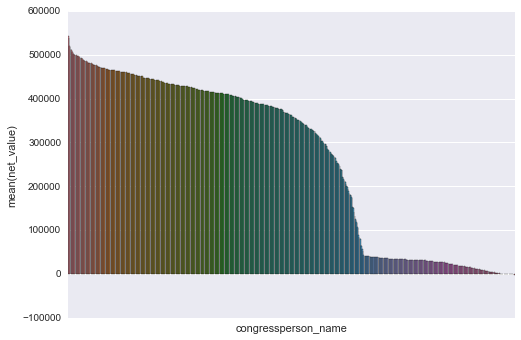

In [37]:
graph = sns.barplot(x='congressperson_name',
                    y='net_value',
                    data=ranking)
graph.axes.get_xaxis().set_ticks([]); None

In [38]:
def x_label_generator(record):
    return '%s (%s - %s)' % (record['congressperson_name'],
                             record['party'],
                             record['state'])

ranking['x_label'] = ranking.apply(x_label_generator, axis=1)

Apparently, politicians from states further away from Distrito Federal expent more. We could perform an analysis on distance to the capital and the home state from the politician.

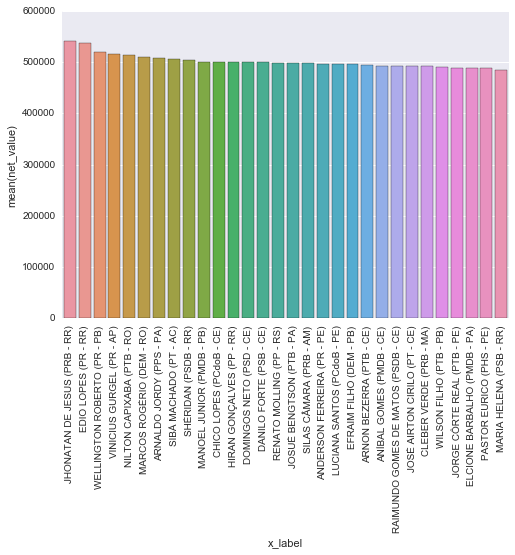

In [39]:
sns.barplot(x='x_label',
            y='net_value',
            data=ranking.head(30))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90); None

In [40]:
list(congressperson_list['congressperson_name'].cat.categories)

['ABEL MESQUITA JR.',
 'ABELARDO CAMARINHA',
 'ABELARDO LUPION',
 'ACELINO POPÓ',
 'ADAIL CARNEIRO',
 'ADALBERTO CAVALCANTI',
 'ADELMO CARNEIRO LEÃO',
 'ADELSON BARRETO',
 'ADEMIR CAMILO',
 'ADILTON SACHETTI',
 'ADRIAN',
 'AELTON FREITAS',
 'AFONSO FLORENCE',
 'AFONSO HAMM',
 'AFONSO MOTTA',
 'AGUINALDO RIBEIRO',
 'AKIRA OTSUBO',
 'ALAN RICK',
 'ALBERTO FILHO',
 'ALBERTO FRAGA',
 'ALCEU MOREIRA',
 'ALESSANDRO MOLON',
 'ALEX CANZIANI',
 'ALEX MANENTE',
 'ALEXANDRE BALDY',
 'ALEXANDRE LEITE',
 'ALEXANDRE ROSO',
 'ALEXANDRE SANTOS',
 'ALEXANDRE SERFIOTIS',
 'ALEXANDRE SILVEIRA',
 'ALEXANDRE TOLEDO',
 'ALEXANDRE VALLE',
 'ALFREDO KAEFER',
 'ALFREDO NASCIMENTO',
 'ALFREDO SIRKIS',
 'ALICE PORTUGAL',
 'ALIEL MACHADO',
 'ALINE CORRÊA',
 'ALMEIDA LIMA',
 'ALTINEU CÔRTES',
 'ALUISIO MENDES',
 'AMAURI TEIXEIRA',
 'AMIR LANDO',
 'ANA PERUGINI',
 'ANDERSON FERREIRA',
 'ANDRE MOURA',
 'ANDREIA ZITO',
 'ANDRES SANCHEZ',
 'ANDRÉ ABDON',
 'ANDRÉ DE PAULA',
 'ANDRÉ FIGUEIREDO',
 'ANDRÉ FUFUCA',
 'ANDRÉ

A few `congressperson_name`s I can't properly explain yet:

In [41]:
sdd = data[data['congressperson_name'] == 'SDD'].sample(random_state=0).iloc[0]
print(document_url(sdd))

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2864/2015/5700427.pdf


721 expenses reimbursed to parties.

In [42]:
parties = congressperson_list[congressperson_list['party'].isnull()]
parties

,applicant_id,congressperson_name,party,state
206216,2442,LIDERANÇA DO PSDB,NaN,NaN
206345,2439,LIDERANÇA DO PT,NaN,NaN
286699,2715,PDT,NaN,NaN
294136,2865,PROS,NaN,NaN
326358,2864,SDD,NaN,NaN


In [43]:
party_expenses = data[data['applicant_id'].isin(parties['applicant_id'])]
len(party_expenses)

721

In [44]:
party_expenses.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
206216,5623603,LIDERANÇA DO PSDB,NaN,NaN,0,NaN,NaN,NaN,3,Fuels and lubricants,...,106.20,3,2015,0,NaN,NaN,1173314,4958,NaN,2442
206217,5711868,LIDERANÇA DO PSDB,NaN,NaN,0,NaN,NaN,NaN,3,Fuels and lubricants,...,137.20,6,2015,0,NaN,NaN,1201648,5066,NaN,2442
206218,5623622,LIDERANÇA DO PSDB,NaN,NaN,0,NaN,NaN,NaN,3,Fuels and lubricants,...,115.88,2,2015,0,NaN,NaN,1173310,4964,NaN,2442
206219,5673529,LIDERANÇA DO PSDB,NaN,NaN,0,NaN,NaN,NaN,3,Fuels and lubricants,...,96.90,5,2015,0,NaN,NaN,1188923,5025,NaN,2442
206220,5719383,LIDERANÇA DO PSDB,NaN,NaN,0,NaN,NaN,NaN,3,Fuels and lubricants,...,118.61,6,2015,0,NaN,NaN,1203914,5073,NaN,2442


## Expenses abroad

Are the expenses made outside of Brazil easily identifiable?

In [45]:
wo_cnpj_cpf = data[data['cnpj_cpf'].isnull()]
len(wo_cnpj_cpf)

48268

In [46]:
wo_cnpj_cpf.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
92,NaN,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,10,Telecommunication,...,99.44,6,2015,0,NaN,NaN,0,0,NaN,3074
93,NaN,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,10,Telecommunication,...,49.62,7,2015,0,NaN,NaN,0,0,NaN,3074
94,NaN,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,10,Telecommunication,...,16.26,3,2015,0,NaN,NaN,0,0,NaN,3074
95,NaN,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,10,Telecommunication,...,177.05,4,2015,0,NaN,NaN,0,0,NaN,3074
96,NaN,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,10,Telecommunication,...,115.54,3,2015,0,NaN,NaN,0,0,NaN,3074


In [47]:
wo_cnpj_cpf.sample(random_state=10).iloc[0]

document_id                                             NaN
congressperson_name                             MAURO LOPES
congressperson_id                                     74749
congressperson_document                                 252
term                                                   2015
state                                                    MG
party                                                  PMDB
term_id                                                  55
subquota_number                                          11
subquota_description                        Postal services
subquota_group_id                                         0
subquota_group_description                              NaN
supplier                      CORREIOS - SEDEX CONVENCIONAL
cnpj_cpf                                                NaN
document_number                               RSP : 2106004
document_type                                             1
issue_date                       2015-01

We could match politicians' location (from oficial agenda and social networks GPS info) with their expenses in a future analysis.

In [48]:
wo_cnpj_cpf['supplier'].unique()

array(['CELULAR FUNCIONAL', 'RAMAL', 'CORREIOS - SEDEX CONVENCIONAL',
       'IMÓVEL FUNCIONAL', 'CORREIOS - CARTA COMERCIAL',
       'CORREIOS - ENCOMENDA PAC', 'CORREIOS - SEDEX 10',
       'CORREIOS - SEDEX 10 COM AR',
       'CORREIOS - SEDEX CONVENCIONAL COM AR',
       'CORREIOS - CARTA REGISTRADA', 'CORREIOS - CARTA REGISTRADA COM AR',
       'CORREIOS - ENCOMENDA PAC COM AR', 'CORREIOS - SEDEX 12',
       'CORREIOS - TELEGRAMA COM CONFIRMAÇÃO', 'CORREIOS - EMS MERCADORIA',
       'CORREIOS - EMS MERCADORIA COM AR', 'CORREIOS - TELEGRAMA',
       'CORREIOS - MALA DIRETA POSTAL BÁSICA',
       'CORREIOS - SEDEX 12 COM AR', 'CORREIOS - EMS DOCUMENTO',
       'CORREIOS - SEDEX MUNDI', 'CopaAirlines', 'Bellagio',
       'COLOSSEUM BAR', 'DGI', "GORDON RAMSAY'S", "JOHNNY ROCKET'S",
       'MANDALAY BAY SHOWROOM', 'SHAKE SHACK', 'STARBUCKS STORE',
       'Bellagio Las Vegas', 'AceCab', 'Anlv Cab', 'Cash Selected',
       'VeriFone', 'CORREIOS - MALA DIRETA POSTAL DOMICILIÁRIA',
      

Let's see how one that we know for sure being from another country, try to find specificities. Aparently, nothing special about it.

In [49]:
montevideo_expense = wo_cnpj_cpf[wo_cnpj_cpf['supplier'] == 'Dazzler Hotel Montevideo'].iloc[0]
montevideo_expense

document_id                                                             5773449
congressperson_name                                               DOMINGOS NETO
congressperson_id                                                        143632
congressperson_document                                                      97
term                                                                       2015
state                                                                        CE
party                                                                       PSD
term_id                                                                      55
subquota_number                                                              14
subquota_description          Lodging, except for congressperson from Distri...
subquota_group_id                                                             0
subquota_group_description                                                  NaN
supplier                                

In [50]:
print(document_url(montevideo_expense))

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2329/2015/5773449.pdf


In [51]:
wo_cnpj_cpf['supplier'] = wo_cnpj_cpf['supplier'].str.lower()
ranking_suppliers_wo_cnpj = wo_cnpj_cpf. \
    groupby('supplier', as_index=False). \
    count()[['supplier', 'applicant_id']]. \
    sort_values('applicant_id', ascending=False)
ranking_suppliers_wo_cnpj.head()

/Users/irio/anaconda3/envs/serenata_de_amor/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,supplier,applicant_id
33,celular funcional,12244
66,correios - sedex convencional,10163
169,ramal,6238
45,correios - carta comercial,5870
55,correios - encomenda pac,3207


In [52]:
expenses_in_brazil = ranking_suppliers_wo_cnpj['supplier'].str.contains('correios') | \
    ranking_suppliers_wo_cnpj['supplier'].isin([
            'celular funcional',
            'imóvel funcional',
            'ramal'])
ranking_suppliers_wo_cnpj[~expenses_in_brazil]

,supplier,applicant_id
87,dazzler hotel montevideo,27
216,verifone,11
174,russell house,7
124,it taxi,5
193,taxi,4
18,bellagio,4
98,el palenque,4
36,center on the developing child - ncpi,3
37,center on the developing child harvard university,3
99,el viejo y el mar,3


In [53]:
expense = data[data['supplier'].str.lower() == 'gordon ramsay\'s'].iloc[0]
expense

document_id                               5660757
congressperson_name                  AFONSO MOTTA
congressperson_id                          178835
congressperson_document                       490
term                                         2015
state                                          RS
party                                         PDT
term_id                                        55
subquota_number                                13
subquota_description          Congressperson meal
subquota_group_id                               0
subquota_group_description                    NaN
supplier                          GORDON RAMSAY'S
cnpj_cpf                                      NaN
document_number                           8881096
document_type                                   2
issue_date                    2015-04-14 00:00:00
document_value                              83.45
remark_value                                    0
net_value                                   83.45


In [54]:
print(document_url(expense))

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2880/2015/5660757.pdf
